# Red Wine Quality Prediction Project# 
Project Descriptio:
n
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).       

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection metho#  ds.
Attribute Inform

ation
Input variables (based on physicochemical t


ests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wil%20Cost%20Insurance/medical_cost_insurance.csv
20Wine/winequality-red.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# load the dataset 

In [2]:
# first read the dataset provided by the organisation or client
wine=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In the data set there  are :
# feature :fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	
# labels: quanlity

In [3]:
# check wheather there is any null present or not?
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

as no null are present

In [4]:
# check the datatype present in the column
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In the data there are 10 float datatype from index (0-10) and index (11) is int datatype

In [5]:
# check the structure and dimension of the data set
wine.shape

(1599, 12)

In the data there are 1599 rows and 12 columns

# data analysis and visulation

In [6]:
# check the description contain in the dataset?
wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


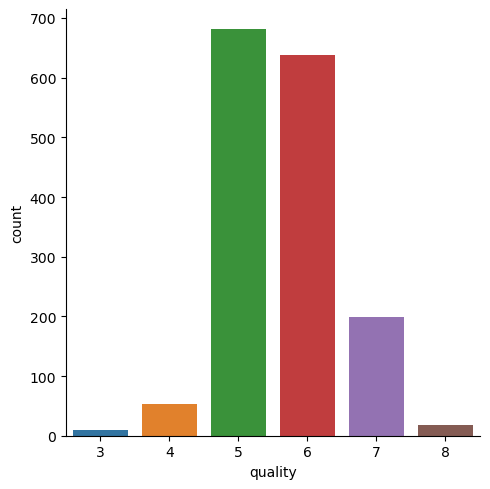

In [7]:
# number of values for each quality
sns.catplot(x='quality', data=wine,kind='count')

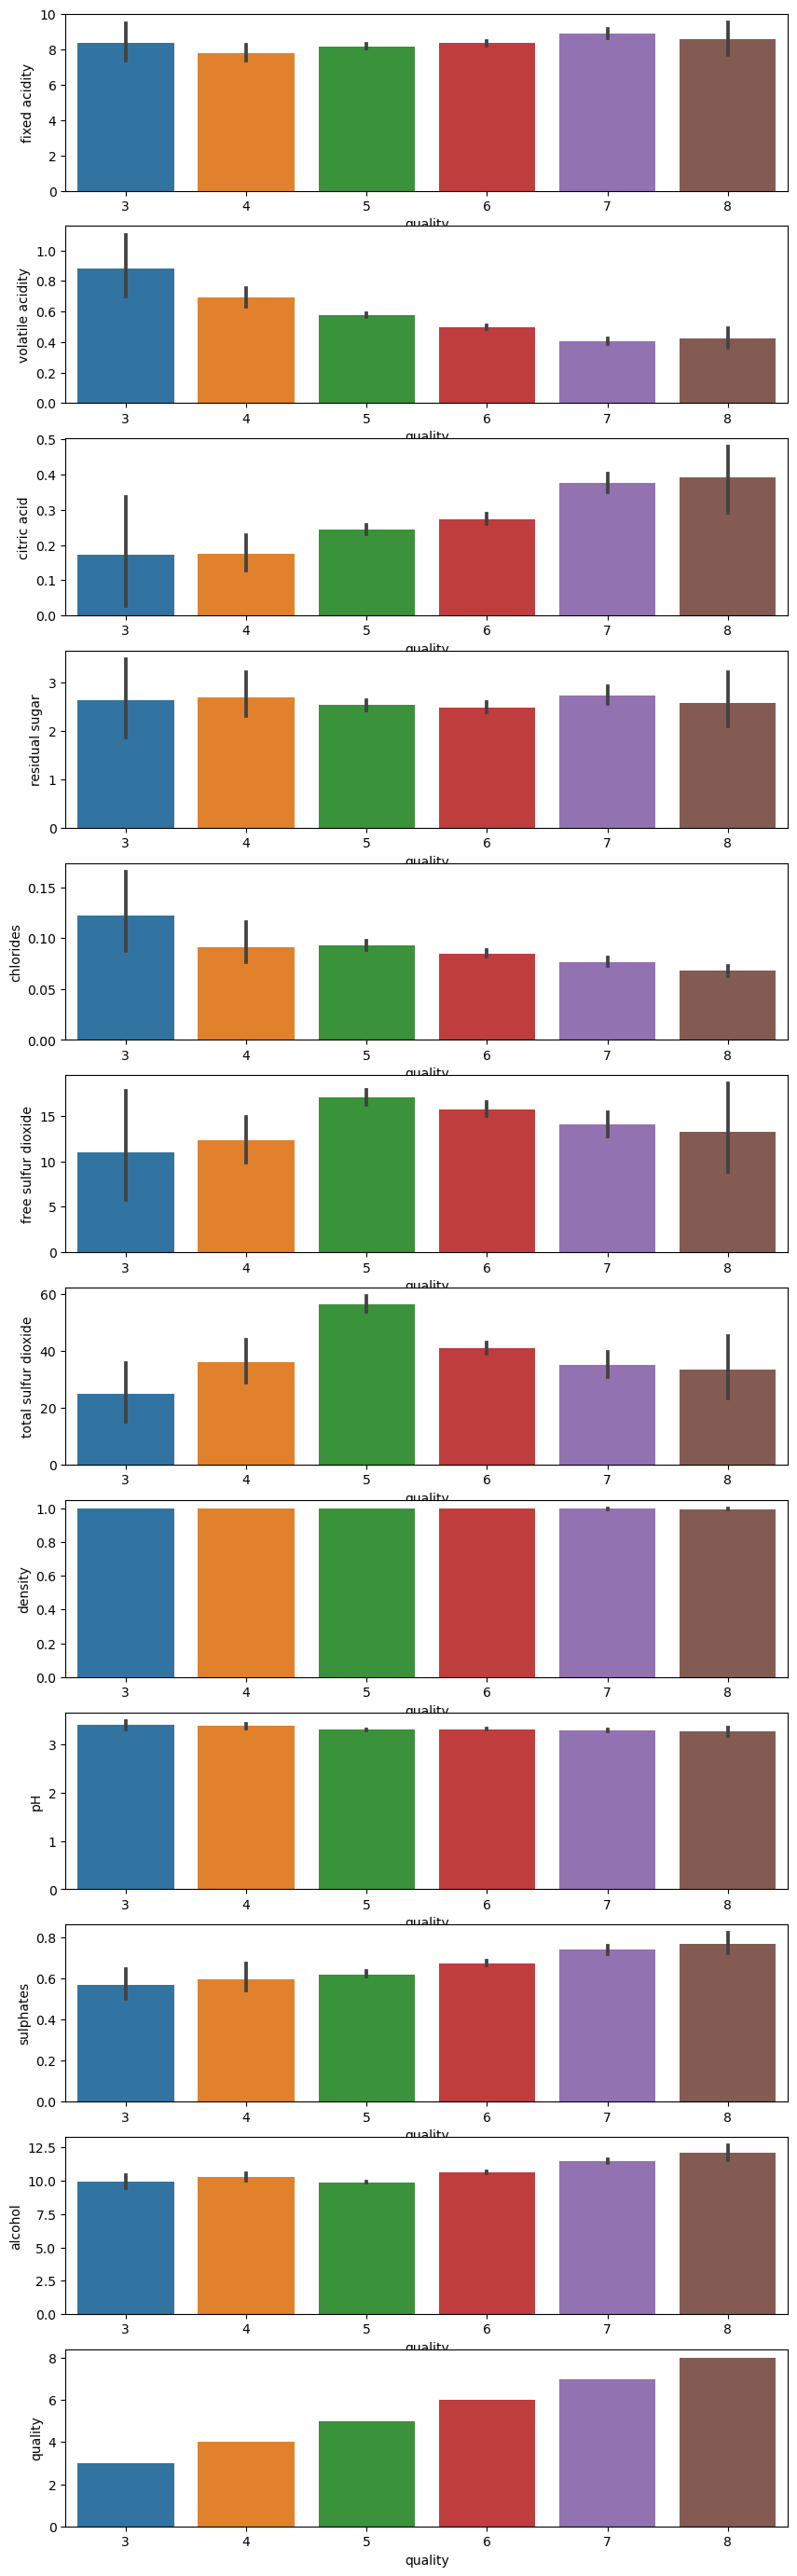

In [8]:

# lets check the relationship of of all the feature with label 
plt.figure(figsize=(10,35),facecolor='w')
plotnumber=1
for column in wine:
    if plotnumber<=12:
    # as there is 12 column in the data
        ax=plt.subplot(12,1,plotnumber)
        sns.barplot(x='quality',y=column,data=wine)
    plotnumber+=1
plt.show()    

we have (3-8) quality values

In [9]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


lets check  the correlation  features and label


In [10]:
correlation=wine.corr()


<Axes: >

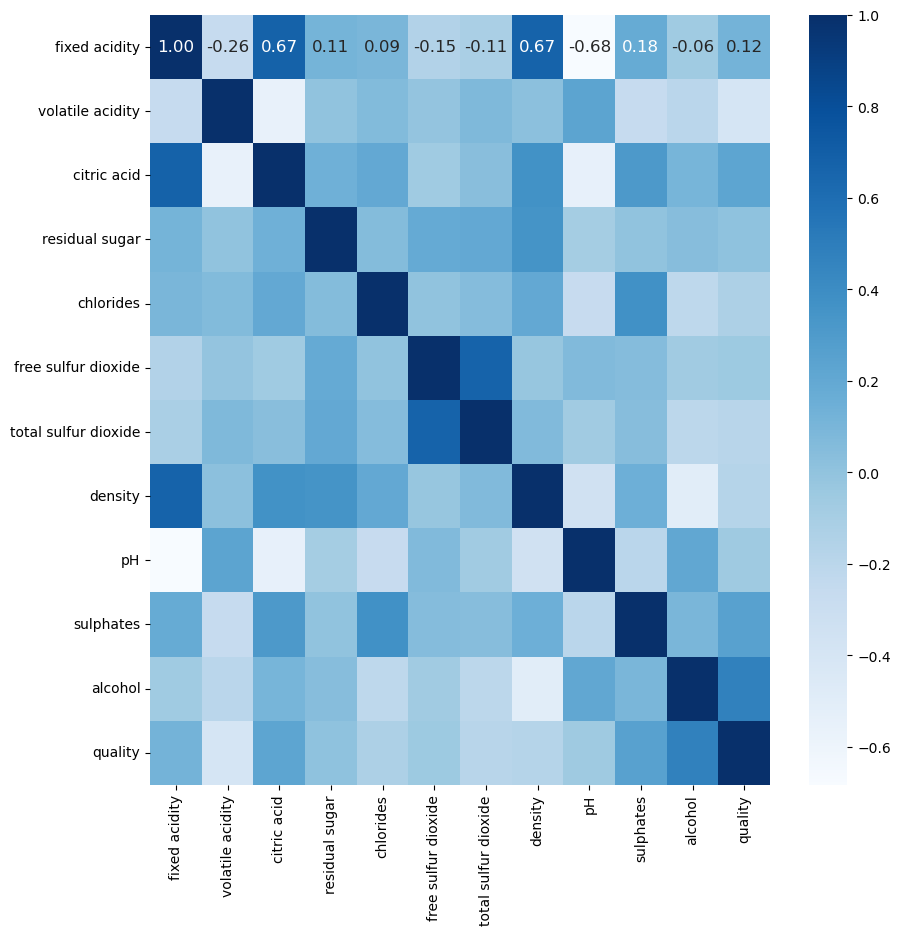

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.2f',annot_kws={'size':12},cmap='Blues')

quality of wine is range between (3-8) on an average respectively

# outliers

fixed acidity              Axes(0.125,0.712609;0.227941x0.167391)
volatile acidity        Axes(0.398529,0.712609;0.227941x0.167391)
citric acid             Axes(0.672059,0.712609;0.227941x0.167391)
residual sugar             Axes(0.125,0.511739;0.227941x0.167391)
chlorides               Axes(0.398529,0.511739;0.227941x0.167391)
free sulfur dioxide     Axes(0.672059,0.511739;0.227941x0.167391)
total sulfur dioxide        Axes(0.125,0.31087;0.227941x0.167391)
density                  Axes(0.398529,0.31087;0.227941x0.167391)
pH                       Axes(0.672059,0.31087;0.227941x0.167391)
sulphates                      Axes(0.125,0.11;0.227941x0.167391)
alcohol                     Axes(0.398529,0.11;0.227941x0.167391)
quality                     Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

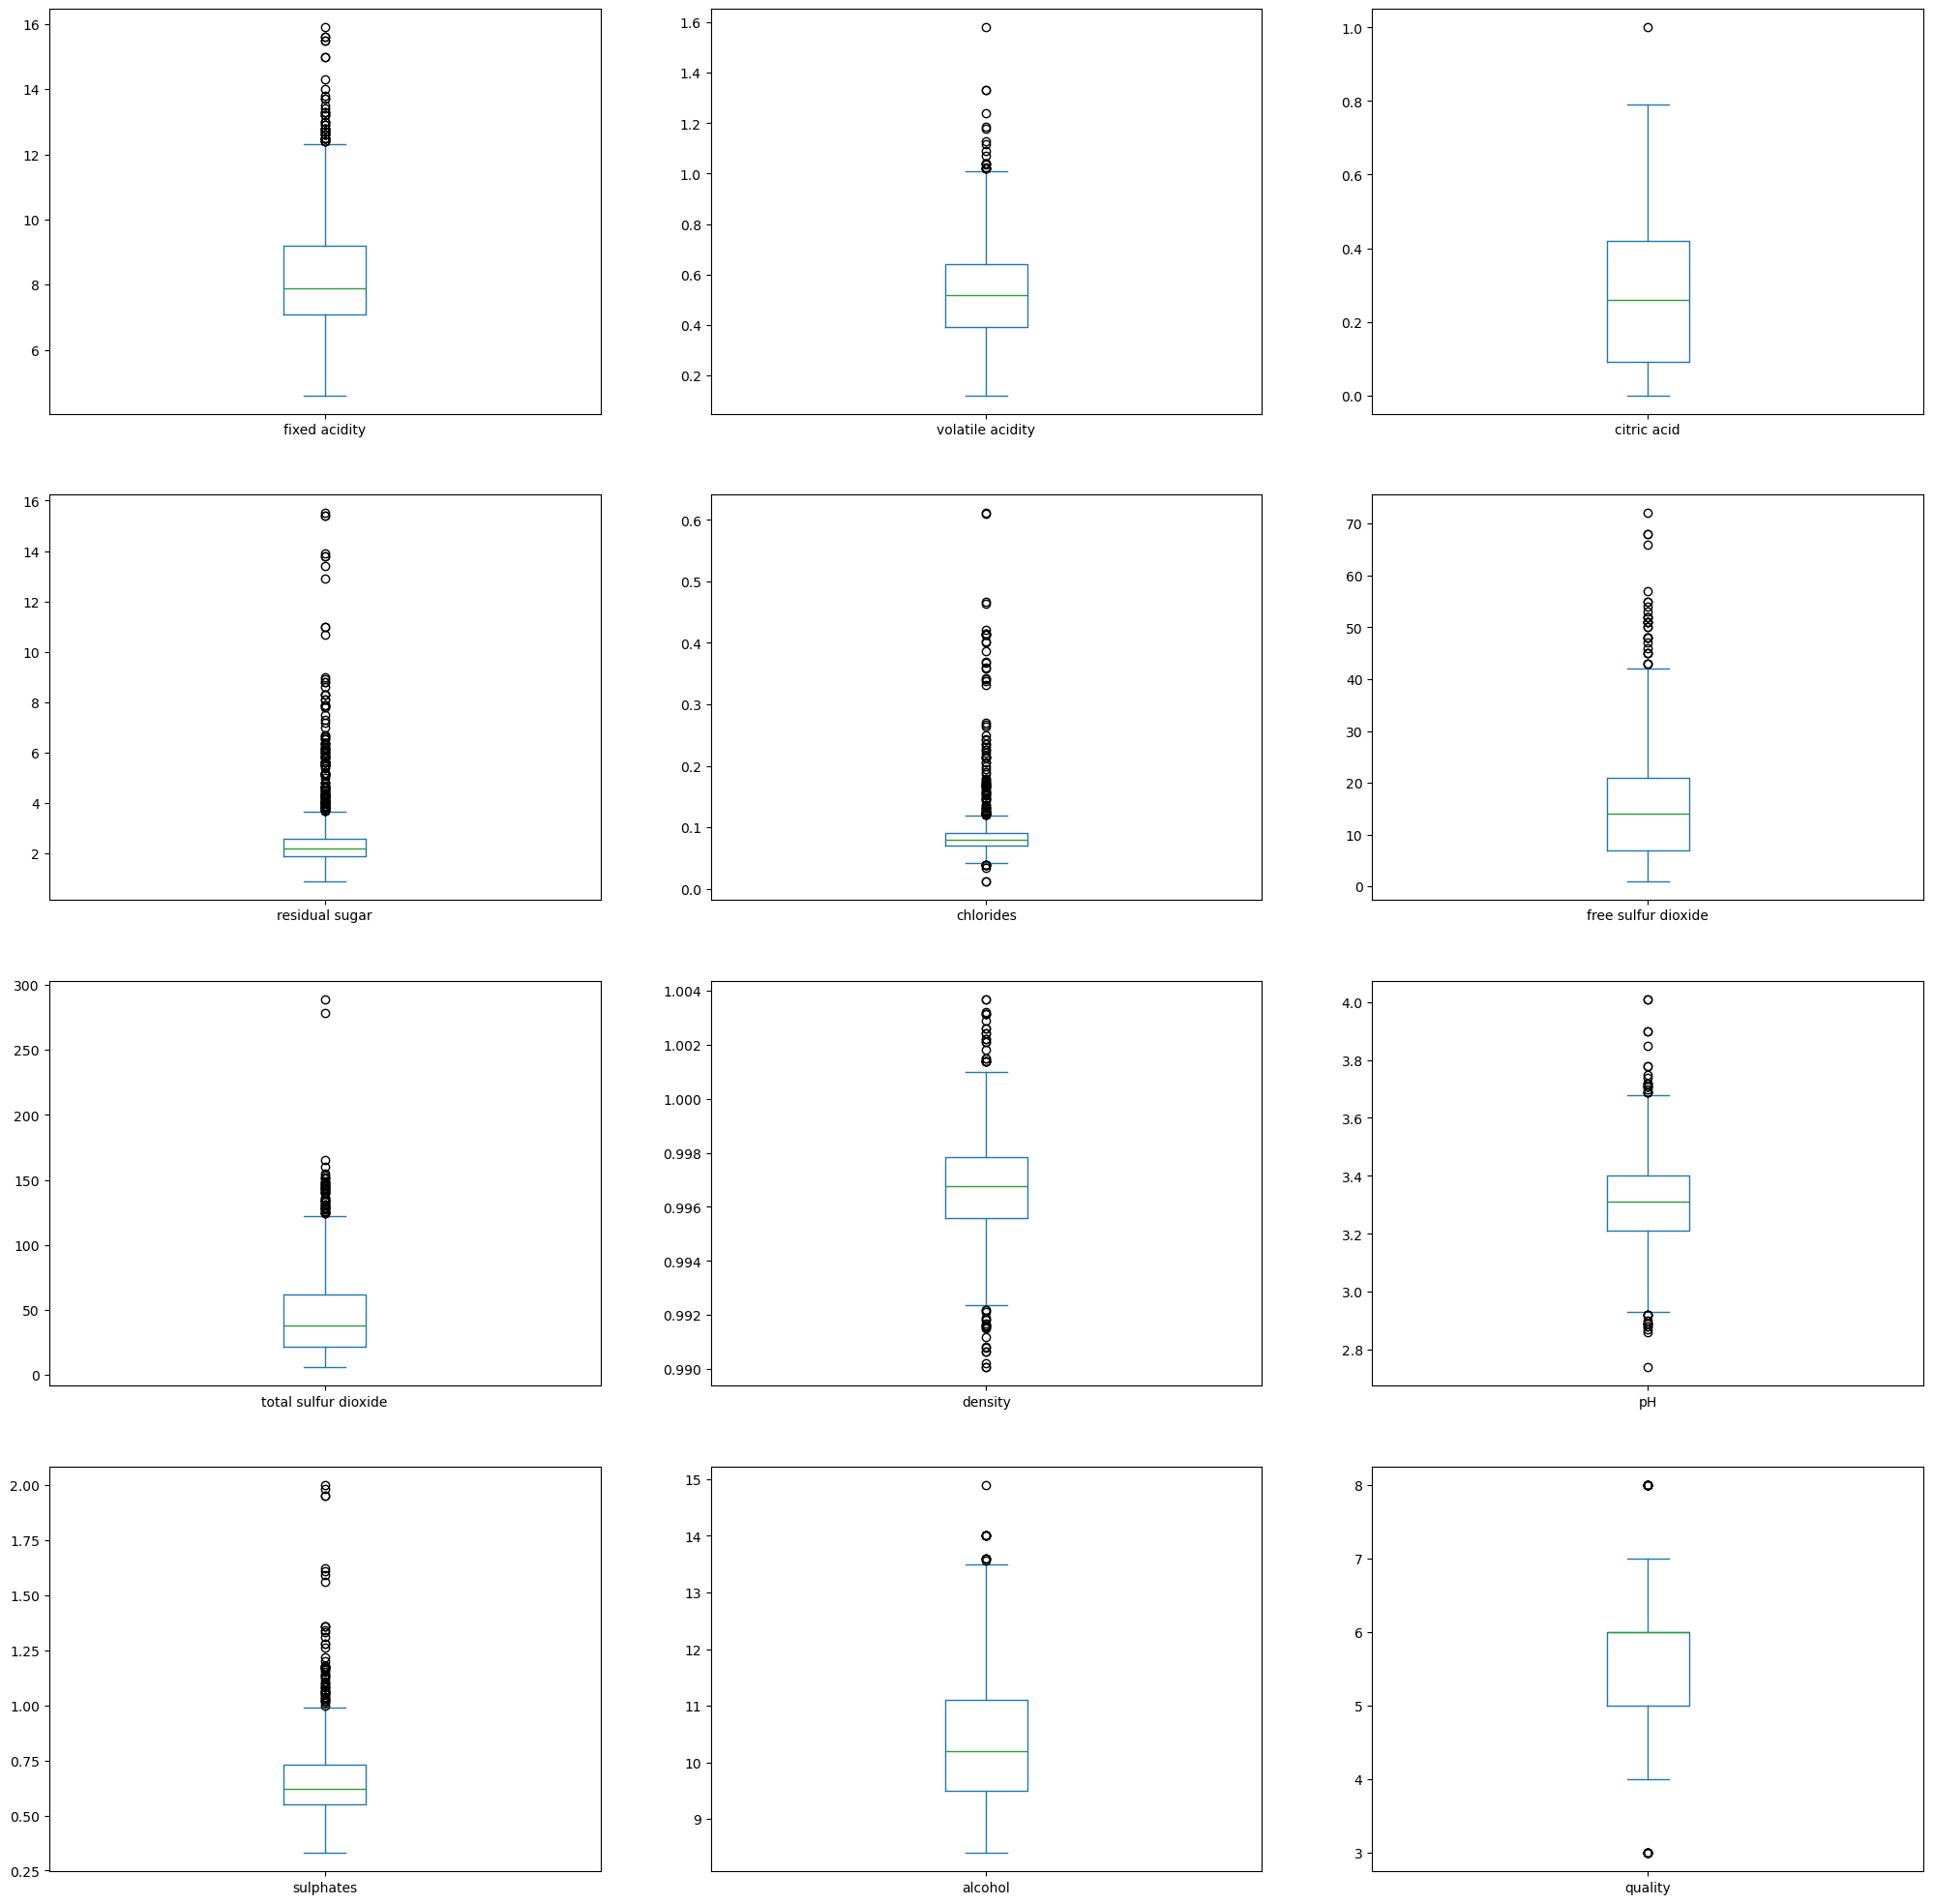

In [12]:
wine.plot(kind='box',subplots=True,layout=(4,3),figsize=(25,25),sharex=False)

the dot which is out side the box is considered as a outlier

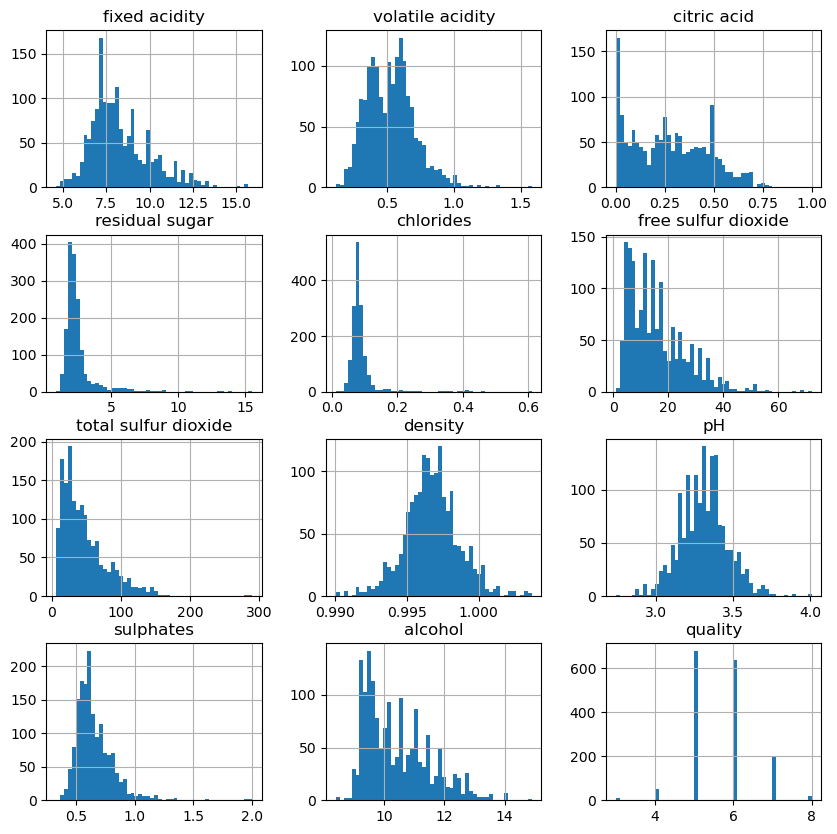

In [13]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

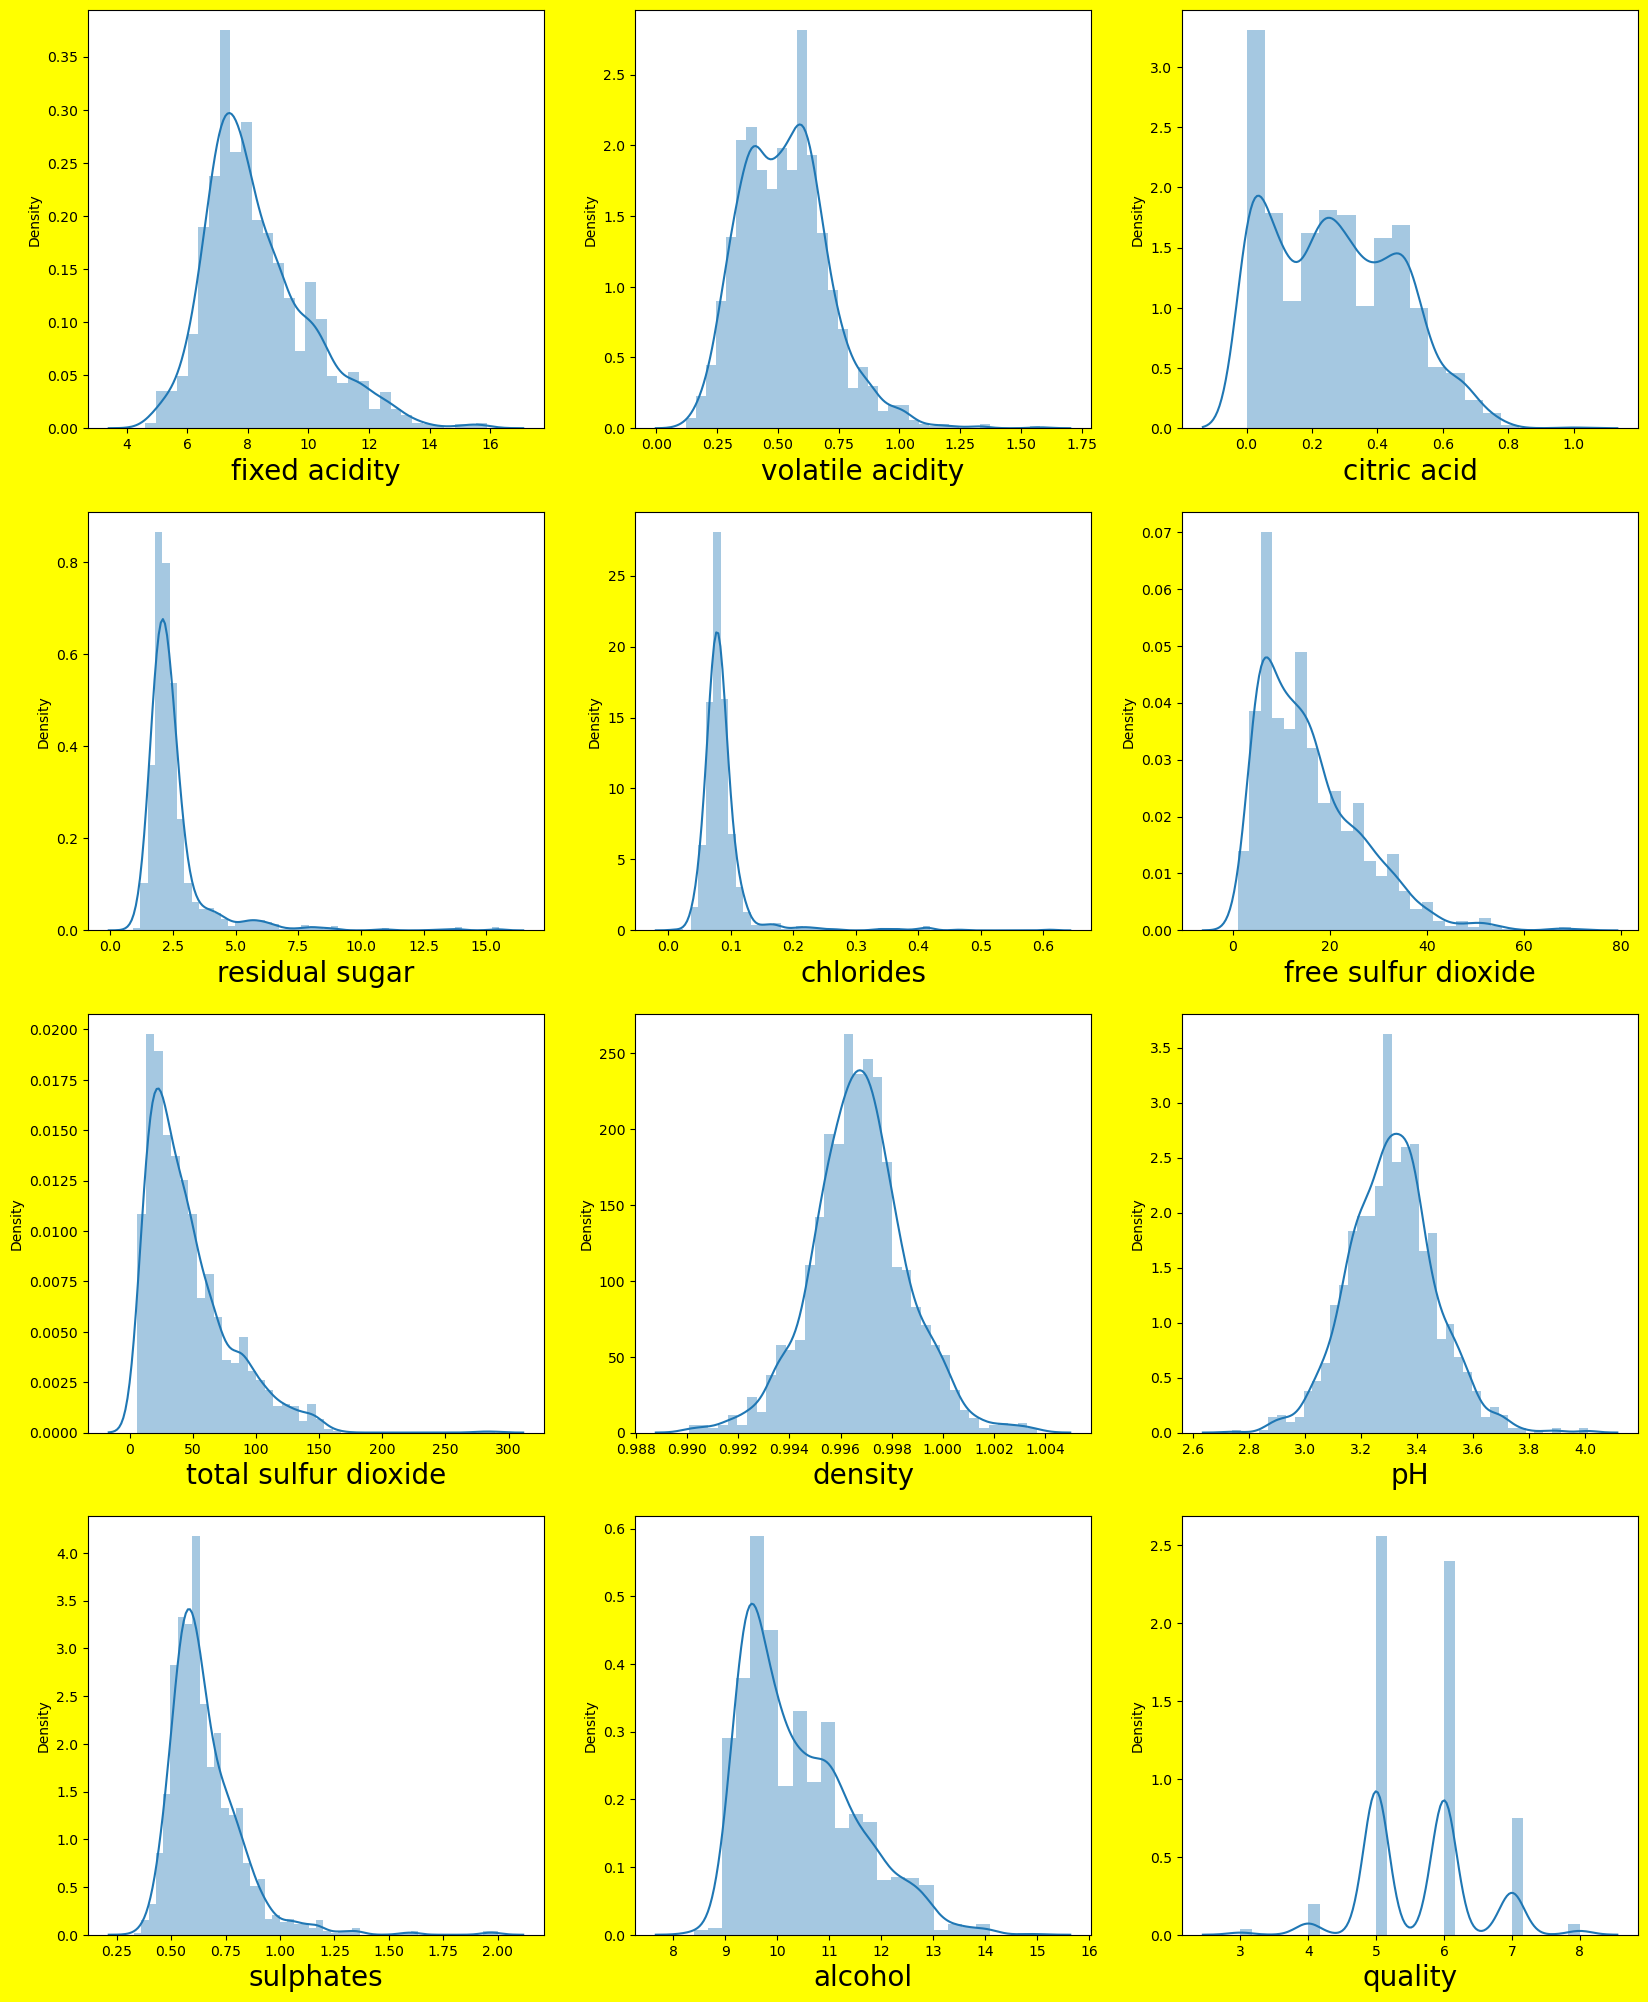

In [14]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in wine:
    if plotnumber<=12:
    # as there is 12 column in the data
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

outlier are present in 
fixed acidity              
volatile acidity       
citric acid             
residual sugar             
chlorides              
free sulfur dioxide     
total sulfur dioxide        
density                  
pH                       
sulphates                      
alcohol  

In [15]:
import numpy as np

# Define a function to handle outlier removal for multiple columns
def remove_outliers(wine, column):
    q1 = wine[column].quantile(0.25)
    q3 = wine[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((wine[column] < low_limit) | (wine[column] > high_limit))
    
    # Drop rows with outliers
    wine = wine.drop(wine.index[index])
    
    return wine

# List of columns to handle outliers
columns_to_check = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']  # Add more columns as needed

# Loop through each column and remove outliers
for col in columns_to_check:
    wine= remove_outliers(wine, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = wine.shape

# Reset index of the 'data' dataframe
wine.reset_index(drop=True, inplace=True)


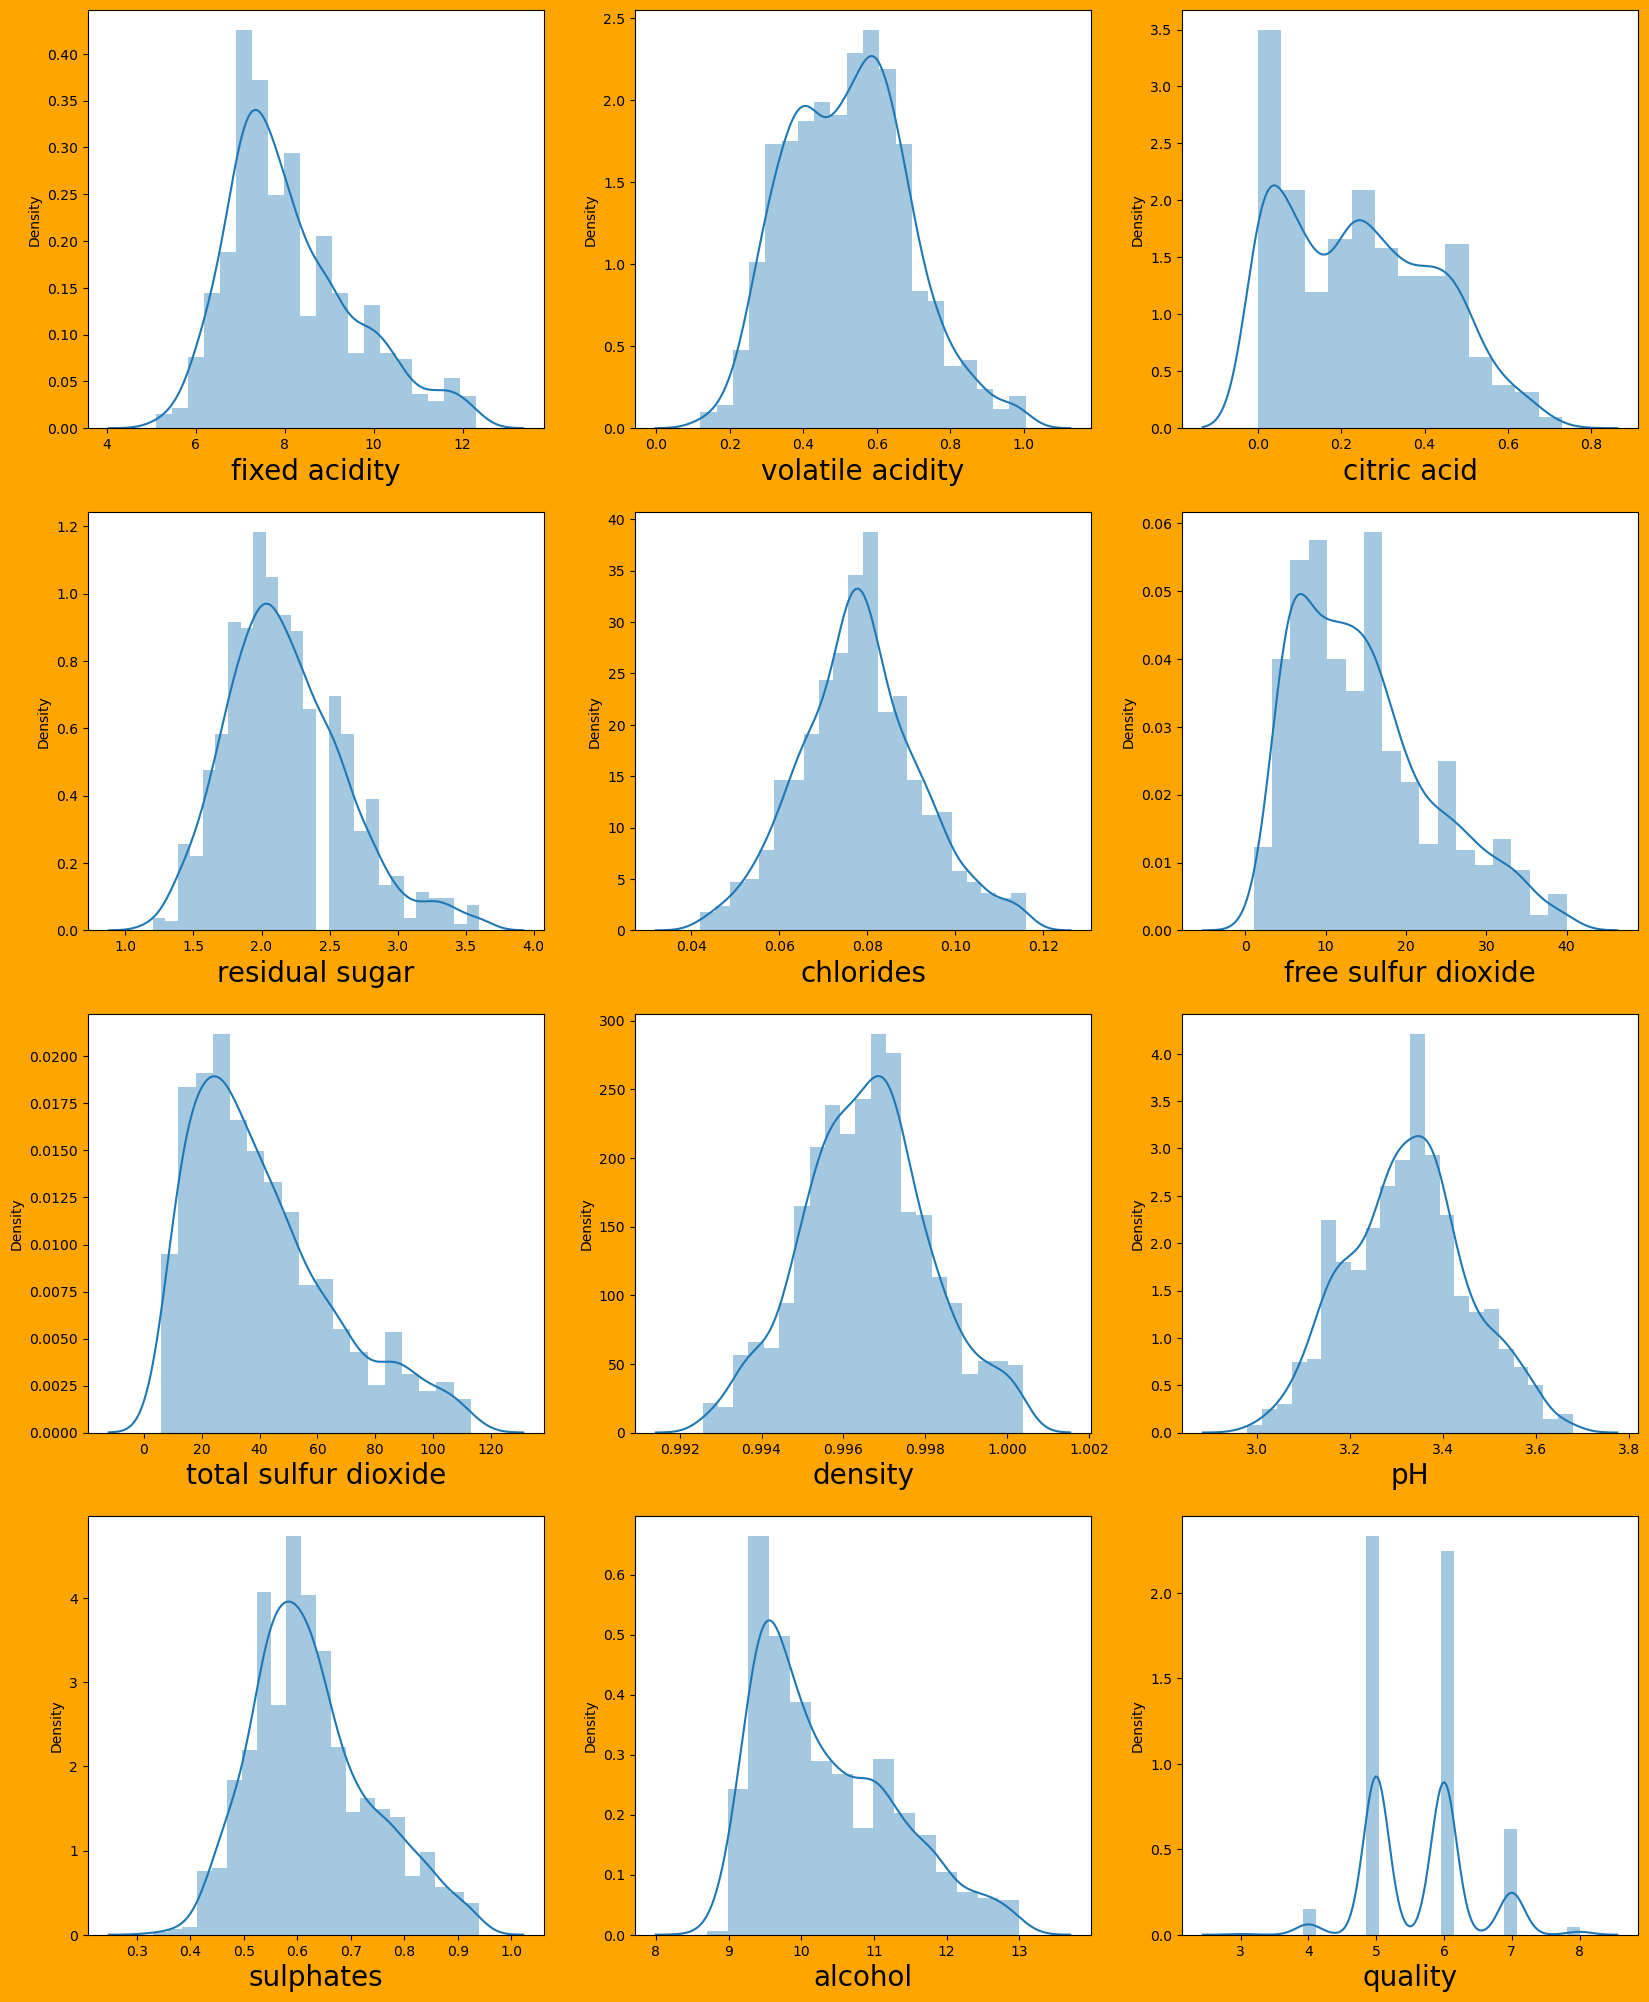

In [16]:
plt.figure(figsize=(20,25),facecolor='orange')
plotnumber=1
for column in wine:
    if plotnumber<=12:
    # as there is 12 column in the data
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

treatment of outlier has been done

In [17]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,8.146784,0.522211,0.246000,2.180617,0.078296,14.788546,40.946256,0.996569,3.325286,0.628405,10.353377,5.637004
std,1.444025,0.164683,0.180343,0.439189,0.013741,8.587718,24.625658,0.001558,0.130173,0.112067,0.953617,0.758518
min,5.100000,0.120000,0.000000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995515,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.400000,0.087000,20.000000,54.000000,0.997500,3.400000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,8.000000


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1135 non-null   float64
 1   volatile acidity      1135 non-null   float64
 2   citric acid           1135 non-null   float64
 3   residual sugar        1135 non-null   float64
 4   chlorides             1135 non-null   float64
 5   free sulfur dioxide   1135 non-null   float64
 6   total sulfur dioxide  1135 non-null   float64
 7   density               1135 non-null   float64
 8   pH                    1135 non-null   float64
 9   sulphates             1135 non-null   float64
 10  alcohol               1135 non-null   float64
 11  quality               1135 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 106.5 KB


# data preprocessing 

In [19]:
X=wine.drop(columns=['quality'],axis=1)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1130,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1131,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1132,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1133,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# label binarilazation with encoder

In [20]:
Y=wine['quality'].apply(lambda y_value: 1 if y_value>7 else 0)

In [21]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1130    0
1131    0
1132    0
1133    0
1134    0
Name: quality, Length: 1135, dtype: int64

# train and test

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=355)

In [23]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1135,) (851,) (284,)


we have dataset values=1135,training data=851,testing data=284

# MODEL training

Randomforestclassifer

In [24]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

# model evaluation

In [25]:
# write one function and call as many as times to check accuracy_score of different models
def metric_score(RFC,X_train,X_test,Y_train,Y_test,train=True):
    if train:
        Y_pred=RFC.predict(X_train)
        print('\n==========================train result====================')
        print(f'accuracy score:{accuracy_score(Y_train,Y_pred)*100:.2f}%')
    elif train==False:
        pred=RFC.predict(X_test)
        print('\n===========test result======================')
        print(f'accuracy score:{accuracy_score(Y_test,pred)*100:.2f}%')
        print('\n  \n test classification report \n',classification_report(Y_test,pred,digits=2))# model confidence/accuracy

In [26]:
# call the function and pass dataset to check train and test score
metric_score(RFC,X_train,X_test,Y_train,Y_test,train=True) # this is for training score
metric_score(RFC,X_train,X_test,Y_train,Y_test,train=False) # this is for testing score


==========================train result====================
accuracy score:100.00%

===========test result======================
accuracy score:99.65%

  
 test classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.00      0.00      0.00         1

    accuracy                           1.00       284
   macro avg       0.50      0.50      0.50       284
weighted avg       0.99      1.00      0.99       284



# lets build the predictive system

In [30]:
wine.sample(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
281,9.5,0.780,0.22,1.9,0.077,6.0,32.0,0.99880,3.26,0.56,10.6,6
815,7.1,0.660,0.00,2.4,0.052,6.0,11.0,0.99318,3.35,0.66,12.7,7
480,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5
212,9.0,0.460,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,6
680,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5
703,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5


In [ ]:
# Get input data from the user for 11 features
input_data = input("Enter 11 features separated by spaces: ")
input_data_list = input_data.split()  # Split the input into a list of strings

try:
    # Convert input data to a numpy array and reshape for 11 features
    input_data_as_numpy_array = np.asarray(input_data_list, dtype=float).reshape(1, -1)

    # Make prediction using the RandomForestClassifier model
    prediction = RFC.predict(input_data_as_numpy_array)

    # Print the prediction
    if prediction[0] == 1:
        print('Good quality wine')
    else:
        print('Bad quality wine')

except ValueError:
    print("Error: Input data must be numeric. Please enter numeric values separated by spaces.")